In [1]:
from xgboost import plot_importance, to_graphviz
from google.colab import drive

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [2]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = "/content/drive/My Drive/Colab Notebooks/Project/Data/"
df = pd.read_csv(path+"PaySim.csv")

# Data Details

## Data table

In [4]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


## Data shape

In [5]:
print("Shape - (Rows, Columns):\n", df.shape)

Shape - (Rows, Columns):
 (6362620, 11)


# Values

## Name origin

The name of the account who initiated the transaction

In [6]:
df['nameOrig'].unique()

array(['C1231006815', 'C1666544295', 'C1305486145', ..., 'C1162922333',
       'C1685995037', 'C1280323807'], dtype=object)

## Types of transactions

In [7]:
# Display the different types of transactions of the TYPE field
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

**PAYMENT** - When a customer pays to acquire goods or services from a merchant, the transaction is termed as Payment. It
decreases the account balance of the sender while account balance of the receiver increases (i.e. amount got credited in his
account).

**TRANSFER** - When one user sends money to another user through mobile money service platform, the transaction is termed as
Transfer.

**CASH_OUT** - Merchant serves as an ATM to the customers and customers can decrease the balance of the account by withdrawing
cash from the merchants.

**DEBIT** - When customer send money from a mobile money service to a bank account, the transaction is termed as Debit. It
decreases balance in the account just like Cash_out transaction.

**CASH_IN** - Merchant serves as an ATM to the customers and customers can increase the balance of the account by paying in cash
to the merchants.

## Steps

A step maps a unit of time in the real world. In this case 1 step is 1 hour of time.

In [8]:
# Display all steps of the STEP field
# Total steps 744 - 30 days simulation
print("Steps - from {} to {}.".format(df['step'].min(), df['step'].max()))

Steps - from 1 to 743.


## Balance <br>

### **oldBalanceOrig** <br>
The initial balance of the sender

### **newBalanceOrig** <br>
The new balance of the sender

### **amount** <br>
The amount of the transaction in local currency

### **oldBalanceDest** <br>
The initial balance of the receiver before the transaction

### **newBalanceDest** <br>
The new balance of the receiver after the transaction

## Fraud <br>

### **isFraud** 
If the transaction is identified as **fraudulent (1)** or **non-fraudulent (0)**

### **isFlaggedFraud**
Flags suspicious transactions as fraud when a user illegally attempts to transfer more than 200.00 in a single transaction

# Data Analysis


## Which transactions are fraudulent?

### Payment

In [9]:
dfFraudPayment = df.loc[(df.isFraud == 1) & (df.type == 'PAYMENT')]
dfTotalPayment = df.loc[(df.type == 'PAYMENT')]

print("Number of fraudulent PAYMENTs = ", len(dfFraudPayment))
print("Number of non-fraudulent PAYMENTs = ", len(df.loc[(df.isFraud == 0) & (df.type == 'PAYMENT')]))
print("Fraud percentage: ", round(((len(dfFraudPayment) / len(dfTotalPayment)) * 100), 3), "%")

Number of fraudulent PAYMENTs =  0
Number of non-fraudulent PAYMENTs =  2151495
Fraud percentage:  0.0 %


### Transfer

In [10]:
dfFraudTransfer = df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')]
dfTotalTransfer = df.loc[(df.type == 'TRANSFER')]

print("Number of fraudulent TRANSFERs = ", len(dfFraudTransfer))
print("Number of non-fraudulent TRANSFERs = ", len(df.loc[(df.isFraud == 0) & (df.type == 'TRANSFER')]))
print("Fraud percentage: ", round(((len(dfFraudTransfer) / len(dfTotalTransfer)) * 100), 3), "%")

Number of fraudulent TRANSFERs =  4097
Number of non-fraudulent TRANSFERs =  528812
Fraud percentage:  0.769 %


### Cash Out

In [11]:
dfFraudCashOut = df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')]
dfTotalCashOut = df.loc[(df.type == 'CASH_OUT')]

print("Number of fraudulent CASH_OUTs = ", len(dfFraudCashOut))
print("Number of non-fraudulent CASH_OUTs = ", len(df.loc[(df.isFraud == 0) & (df.type == 'CASH_OUT')]))
print("Fraud percentage: ", round(((len(dfFraudCashOut) / len(dfTotalCashOut)) * 100), 3), "%")

Number of fraudulent CASH_OUTs =  4116
Number of non-fraudulent CASH_OUTs =  2233384
Fraud percentage:  0.184 %


### Debit

In [12]:
dfFraudDebit = df.loc[(df.isFraud == 1) & (df.type == 'DEBIT')]
dfTotalDebit = df.loc[(df.type == 'DEBIT')]

print("Number of fraudulent DEBITs = ", len(dfFraudDebit))
print("Number of non-fraudulent DEBITs = ", len(df.loc[(df.isFraud == 0) & (df.type == 'DEBIT')]))
print("Fraud percentage: ", round(((len(dfFraudDebit) / len(dfTotalDebit)) * 100), 3), "%")

Number of fraudulent DEBITs =  0
Number of non-fraudulent DEBITs =  41432
Fraud percentage:  0.0 %


### Cash In

In [13]:
dfFraudCashIn = df.loc[(df.isFraud == 1) & (df.type == 'CASH_IN')]
dfTotalCashIn = df.loc[(df.type == 'CASH_IN')]

print("Number of fraudulent CASH_INs = ", len(dfFraudCashIn))
print("Number of fraudulent CASH_INs = ", len(df.loc[(df.isFraud == 0) & (df.type == 'CASH_IN')]))
print("Fraud percentage: ", round(((len(dfFraudCashIn) / len(dfTotalCashIn)) * 100), 3), "%")

Number of fraudulent CASH_INs =  0
Number of fraudulent CASH_INs =  1399284
Fraud percentage:  0.0 %


### Results

Total fraud transactions: 0.13%


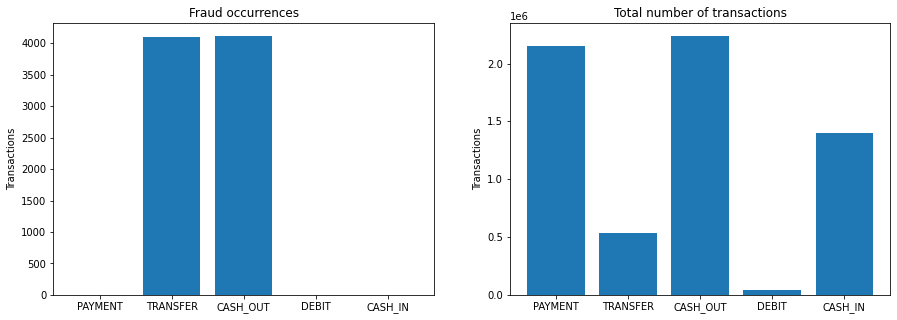

In [14]:
fraudTrans = (len(df['isFraud'].loc[(df.isFraud == 1)]) / df.shape[0]) * 100
print("Total fraud transactions: {}%".format(round(fraudTrans, 2)))

total = [len(dfTotalPayment), len(dfTotalTransfer), len(dfTotalCashOut), len(dfTotalDebit), len(dfTotalCashIn)]
fraud = [len(dfFraudPayment), len(dfFraudTransfer), len(dfFraudCashOut), len(dfFraudDebit), len(dfFraudCashIn)]
names = ["PAYMENT", "TRANSFER", "CASH_OUT", "DEBIT", "CASH_IN"]

fig, axs = plt.subplots(1, 2, figsize=(15, 5), )

axs[0].bar(names, fraud)
axs[0].set_title("Fraud occurrences")
axs[0].set_ylabel("Transactions")

axs[1].bar(names, total)
axs[1].set_title("Total number of transactions")
axs[1].set_ylabel("Transactions")

plt.show()

## What determines whether the feature isFlaggedFraud gets set or not?

There are only 16 entries out of 6.3 million where isFlaggedFraud is set to 1. The isFlaggedFraud column is set only when a **TRANSFER** is done and the **AMOUNT** is greater than 200,000 (local currency). 

In [15]:
dfFlagged = df.loc[df.isFlaggedFraud == 1]
print("Number of isFlaggedFraud = 1 transactions: ", len(dfFlagged),"\n\n")
dfFlagged

Number of isFlaggedFraud = 1 transactions:  16 




,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In the latter table, the **oldbalanceDest** and **newbalanceDest** are identical (0.00). This might be because the transaction is halted when the threshold is reached. However **isFlaggedFraud** can remain 0 in **TRANSFERs** where **oldbalanceDest** and **newbalanceDest** can both be 0.<br><br>**Hence these conditions do not determine the state of isFlaggedFraud.**

In [16]:
print('\nNumber of TRANSFERs where isFlaggedFraud = 0, oldbalanceDest = 0 and newbalanceDest = 0: \n{}'.\
format(len(dfTotalTransfer.loc[(dfTotalTransfer.isFlaggedFraud == 0) & \
(dfTotalTransfer.oldbalanceDest == 0) & (dfTotalTransfer.newbalanceDest == 0)]))) # 4158


Number of TRANSFERs where isFlaggedFraud = 0, oldbalanceDest = 0 and newbalanceDest = 0: 
4158


Even if the **isFlaggedFraud** condition is met, in some cases the its value remains 0.

In [17]:
# The minimum amount is more than 200000 local currency
print("Minimum amount where isFlaggedFraud is set: ", dfFlagged.amount.min())

print("Maximum amount in TRANSFER where isFlaggedFraud is not set: {}\n".format(dfTotalTransfer.loc[dfTotalTransfer.isFlaggedFraud == 0].amount.max()))
transfers = dfTotalTransfer.loc[dfTotalTransfer.amount > 200000]

# Show table where amount > 200,000 and isFLaggedFraud == 0
transfers.loc[transfers.isFlaggedFraud == 0]

Minimum amount where isFlaggedFraud is set:  353874.22
Maximum amount in TRANSFER where isFlaggedFraud is not set: 92445516.64



,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
82,1,TRANSFER,224606.64,C873175411,0.00,0.0,C766572210,354678.92,0.00,0,0
84,1,TRANSFER,379856.23,C1449772539,0.00,0.0,C1590550415,900180.00,19169204.93,0,0
85,1,TRANSFER,1505626.01,C926859124,0.00,0.0,C665576141,29031.00,5515763.34,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362608,742,TRANSFER,258355.42,C1226129332,258355.42,0.0,C1744173808,0.00,0.00,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0


In addition **isFlaggedFraud** cannot be a threshold on **oldbalanceOrg** because values overlap. The maximum value of **oldbalanceOrg** is more than 200,000 when **isFlaggedFraud = 0** 

In [18]:
print('\nMin, Max of oldbalanceOrg for isFlaggedFraud = 1 TRANSFERs: {}'.format([round(dfFlagged.oldbalanceOrg.min()), round(dfFlagged.oldbalanceOrg.max())]))

# Max value is greater than 200000 local currency
print('\nMin, Max of oldbalanceOrg for isFlaggedFraud = 0 TRANSFERs where oldbalanceOrg = newbalanceOrig: {}'.format(\
[dfTotalTransfer.loc[(dfTotalTransfer.isFlaggedFraud == 0) & (dfTotalTransfer.oldbalanceOrg == dfTotalTransfer.newbalanceOrig)].oldbalanceOrg.min(), \
round(dfTotalTransfer.loc[(dfTotalTransfer.isFlaggedFraud == 0) & (dfTotalTransfer.oldbalanceOrg == dfTotalTransfer.newbalanceOrig)].oldbalanceOrg.max())]))


Min, Max of oldbalanceOrg for isFlaggedFraud = 1 TRANSFERs: [353874, 19585040]

Min, Max of oldbalanceOrg for isFlaggedFraud = 0 TRANSFERs where oldbalanceOrg = newbalanceOrig: [0.0, 575668]


Another question to answer is if **isFlaggedFraud** is set based on seeing a customer doing a transaction more than once. Duplicate customers do not exist when **isFlaggedFraud = 0**. However duplicates exist when **isFlaggedFraud = 1**.

In [19]:
# Flagged transactions
dfFlagged = df.loc[df.isFlaggedFraud == 1]

# Not flagged transactions
dfNotFlagged = df.loc[df.isFlaggedFraud == 0]

print('Is the transaction\'s nameOrig flagged as fraud more than once? {}\n'.format((dfFlagged.nameOrig.isin(pd.concat([dfNotFlagged.nameOrig, dfNotFlagged.nameDest]))).any()))

print('Have destinations for transactions flagged as fraud initiated other transactions? {}\n'.format((dfFlagged.nameDest.isin(dfNotFlagged.nameOrig)).any()))

print('How many destination accounts of transactions flagged as fraud have been destination accounts more than once?: {}'.format(sum(dfFlagged.nameDest.isin(dfNotFlagged.nameDest))))

Is the transaction's nameOrig flagged as fraud more than once? False

Have destinations for transactions flagged as fraud initiated other transactions? False

How many destination accounts of transactions flagged as fraud have been destination accounts more than once?: 2


## Are expected merchant accounts accordingly labelled?

Merchants (**'M'**) are not involved in **CASH_IN** (paid by the merchant) transactions to customers (**'C'**). There are also no merchants among destination accounts for **CASH_OUT** transactions (paying a merchant). However merchants exist for all **PAYMENTs** transactions in **nameDest**. 

In [20]:
print('Are there any merchants in nameOrig for CASH_IN transactions? {}\n'.format((df.loc[df.type == 'CASH_IN'].nameOrig.str.contains('M')).any()))

print('Are there any merchants in nameDest for CASH_OUT transactions? {}\n'.format((df.loc[df.type == 'CASH_OUT'].nameDest.str.contains('M')).any()))

print('Are there any transactions that do not have merchants in nameDest in the PAYMENT type? {}'.format((df.loc[df.nameDest.str.contains('M')].type != 'PAYMENT').any()))

Are there any merchants in nameOrig for CASH_IN transactions? False

Are there any merchants in nameDest for CASH_OUT transactions? False

Are there any transactions that do not have merchants in nameDest in the PAYMENT type? False


## Are there account labels common to fraudulent transactions

From the data, fraud involves initially **TRANSFERing** money to an account and then withdrawing (**CASH_OUT**) it, hence the **nameDest** for **TRANSFER** and **nameOrig** for **CASH_OUT** should match. However this is not the case.

In [21]:
print('Are there any transactions where nameDest for TRANSFER and nameOrig for CASH_OUT match? {}\n\n'.format((dfFraudTransfer.nameDest.isin(dfFraudCashOut.nameOrig)).any()))

df.loc[df.isFraud == 1]

Are there any transactions where nameDest for TRANSFER and nameOrig for CASH_OUT match? False




,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


There are 3 accounts where there is a fraudulent **TRANSFER** where the original **CASHOUT** is not detected and labeled as genuine. 2 out of 3 accounts initially made a genuine **CASH_OUT** and then receive a fraudulent **TRANSFER**. Fraudulent transactios cannot be indicated by the **nameOrig** and **nameDest** features.

In [22]:
dfNotFraud = df.loc[df.isFraud == 0]
print("Fraudulent TRANSFERs where the destination accounts initially had genuine CASH_OUTs.\n\n")
dfFraudTransfer.loc[dfFraudTransfer.nameDest.isin(dfNotFraud.loc[dfNotFraud.type == 'CASH_OUT'].nameOrig.drop_duplicates())]

Fraudulent TRANSFERs where the destination accounts initially had genuine CASH_OUTs.




,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1030443,65,TRANSFER,1282971.57,C1175896731,1282971.57,0.0,C1714931087,0.0,0.0,1,0
6039814,486,TRANSFER,214793.32,C2140495649,214793.32,0.0,C423543548,0.0,0.0,1,0
6362556,738,TRANSFER,814689.88,C2029041842,814689.88,0.0,C1023330867,0.0,0.0,1,0


# Data cleaning

## Redundant columns

Fraud only occurs in **TRANSFERs** and **CASH_OUTs**. The fields **nameOrig**, **nameDest** and **isFlaggedFraud** are irrelevant (as described in the Data Analysis section). 

Total fraud transactions: 0.13%


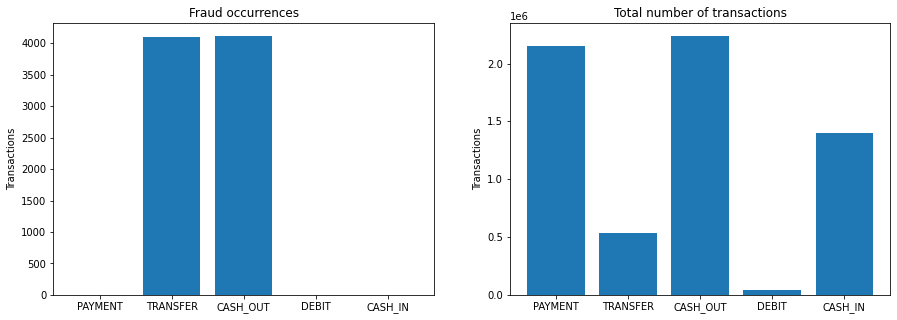

In [23]:
fraudTrans = (len(df['isFraud'].loc[(df.isFraud == 1)]) / df.shape[0]) * 100
print("Total fraud transactions: {}%".format(round(fraudTrans, 2)))

total = [len(dfTotalPayment), len(dfTotalTransfer), len(dfTotalCashOut), len(dfTotalDebit), len(dfTotalCashIn)]
fraud = [len(dfFraudPayment), len(dfFraudTransfer), len(dfFraudCashOut), len(dfFraudDebit), len(dfFraudCashIn)]
names = ["PAYMENT", "TRANSFER", "CASH_OUT", "DEBIT", "CASH_IN"]

fig, axs = plt.subplots(1, 2, figsize=(15, 5), )

axs[0].bar(names, fraud)
axs[0].set_title("Fraud occurrences")
axs[0].set_ylabel("Transactions")

axs[1].bar(names, total)
axs[1].set_title("Total number of transactions")
axs[1].set_ylabel("Transactions")

plt.show()

In [24]:
X = df.loc[(df.type == 'TRANSFER') | (df.type == 'CASH_OUT')]
# Drop irrelevant columns
X = X.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)

Y = X['isFraud']

## Data Encoding

In order to apply different machine learning algorithms to the data, the fields need to be numbers. **TRANSFERs** are denoted by **0** and **CASH_OUTs** by **1**.

In [25]:
X.loc[X.type == 'TRANSFER', 'type'] = 0
X.loc[X.type == 'CASH_OUT', 'type'] = 1

# Convert X.type dtype column from string to int
X.type = X.type.astype(int)

# Display data
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,0,181.00,181.00,0.0,0.00,0.00,1
3,1,1,181.00,181.00,0.0,21182.00,0.00,1
15,1,1,229133.94,15325.00,0.0,5083.00,51513.44,0
19,1,0,215310.30,705.00,0.0,22425.00,0.00,0
24,1,0,311685.89,10835.00,0.0,6267.00,2719172.89,0
...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.0,0.00,339682.13,1
6362616,743,0,6311409.28,6311409.28,0.0,0.00,0.00,1
6362617,743,1,6311409.28,6311409.28,0.0,68488.84,6379898.11,1
6362618,743,0,850002.52,850002.52,0.0,0.00,0.00,1


## Missing Values

The data has transactions with 0.00 in **newbalanceDest** before and after a non-zero **amount** is transacted, meaning that the **newbalanceDest** field is possibly related to fraud. We replace the value of 0 with -1 which will be more useful for the different machine learning algorithms.

In [26]:
Xfraud = X.loc[Y == 1]
XnonFraud = X.loc[Y == 0]
print('\nThe fraction of fraudulent transactions with \'oldBalanceDest\' = \'newBalanceDest\' = 0 although the transacted \'amount\' is non-zero is: {}'.\
format(len(Xfraud.loc[(Xfraud.oldbalanceDest == 0) & (Xfraud.newbalanceDest == 0) & (Xfraud.amount)]) / (1.0 * len(Xfraud))))

print('\nThe fraction of genuine transactions with \'oldBalanceDest\' = \'newBalanceDest\' = 0 although the transacted \'amount\' is non-zero is: {}\n\n'.\
format(len(XnonFraud.loc[(XnonFraud.oldbalanceDest == 0) & (XnonFraud.newbalanceDest == 0) & (XnonFraud.amount)]) / (1.0 * len(XnonFraud))))

X.loc[(X.oldbalanceDest == 0) & (X.newbalanceDest == 0) & (X.amount != 0), ['oldbalanceDest', 'newbalanceDest']] = - 1
X


The fraction of fraudulent transactions with 'oldBalanceDest' = 'newBalanceDest' = 0 although the transacted 'amount' is non-zero is: 0.4955558261293072

The fraction of genuine transactions with 'oldBalanceDest' = 'newBalanceDest' = 0 although the transacted 'amount' is non-zero is: 0.0006176245277308345




,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,0,181.00,181.00,0.0,-1.00,-1.00,1
3,1,1,181.00,181.00,0.0,21182.00,0.00,1
15,1,1,229133.94,15325.00,0.0,5083.00,51513.44,0
19,1,0,215310.30,705.00,0.0,22425.00,0.00,0
24,1,0,311685.89,10835.00,0.0,6267.00,2719172.89,0
...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.0,0.00,339682.13,1
6362616,743,0,6311409.28,6311409.28,0.0,-1.00,-1.00,1
6362617,743,1,6311409.28,6311409.28,0.0,68488.84,6379898.11,1
6362618,743,0,850002.52,850002.52,0.0,-1.00,-1.00,1


There are also several transactions where the balance is 0 in **oldbalanceOrg** and **newbalanceOrig**.

In [27]:
print("There are {} legit transactions when oldbalanceOrg and newbalanceOrg are 0 and there is no fraud.\n"\
      .format(len(X.loc[(X.oldbalanceOrg == 0.0) & (X.newbalanceOrig == 0) & (X.isFraud == 0)])))

print("There are {} fraud transactions when oldbalanceOrg and newbalanceOrg are 0 and there is no fraud."\
      .format(len(X.loc[(X.oldbalanceOrg == 0.0) & (X.newbalanceOrig == 0) & (X.isFraud == 1)])))

# Where oldbalanceOrg and newbalanceOrg are 0 => change to Not a Number
# X.loc[(X.oldbalanceOrg == 0) & (X.newbalanceOrig == 0) & (X.amount != 0), ['oldbalanceOrg', 'newbalanceOrig']] = np.nan
# X

There are 1308541 legit transactions when oldbalanceOrg and newbalanceOrg are 0 and there is no fraud.

There are 41 fraud transactions when oldbalanceOrg and newbalanceOrg are 0 and there is no fraud.


# Feature Engineering

There is a big difference between fraudulent and genuine transactions when there is a zero-balance serving. Two new columns are created which record errors in the originating (**errorBalanceOrig**) and destination (**errorBalanceDest**) accounts for each transaction. This helps helps distinguish zero-balanced fraudulent and genuine transactions. These features are important to get the best performance from Machine Learning algorithms.

In [28]:
X['errorBalanceOrig'] = X.newbalanceOrig + X.amount - X.oldbalanceOrg
X['errorBalanceDest'] = X.oldbalanceDest + X.amount - X.newbalanceDest
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorBalanceOrig,errorBalanceDest
2,1,0,181.00,181.00,0.0,-1.00,-1.00,1,0.00,1.810000e+02
3,1,1,181.00,181.00,0.0,21182.00,0.00,1,0.00,2.136300e+04
15,1,1,229133.94,15325.00,0.0,5083.00,51513.44,0,213808.94,1.827035e+05
19,1,0,215310.30,705.00,0.0,22425.00,0.00,0,214605.30,2.377353e+05
24,1,0,311685.89,10835.00,0.0,6267.00,2719172.89,0,300850.89,-2.401220e+06
...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.0,0.00,339682.13,1,0.00,0.000000e+00
6362616,743,0,6311409.28,6311409.28,0.0,-1.00,-1.00,1,0.00,6.311409e+06
6362617,743,1,6311409.28,6311409.28,0.0,68488.84,6379898.11,1,0.00,1.000000e-02
6362618,743,0,850002.52,850002.52,0.0,-1.00,-1.00,1,0.00,8.500025e+05


## Time visualisation

### Transactions Over Time

The following histograms show the time patterns for valid and fraudulent transactions. Most valid transactions occur around from **0** to **60** time step and from **110** to **410**. The visualizations represent the number of transactions for every time step of the month.

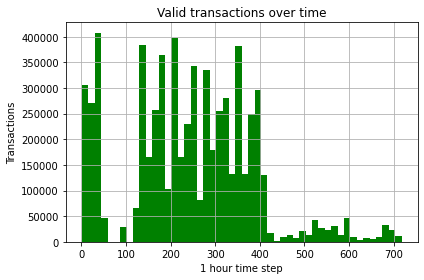

In [29]:
genuine = df[df["isFraud"] == 0].drop(["nameOrig", "nameDest", "isFlaggedFraud"], 1)

bins = 50

genuine.hist(column="step",color="green",bins=bins)
plt.xlabel("1 hour time step")
plt.ylabel("Transactions")
plt.title("Valid transactions over time")
plt.tight_layout()
plt.show()

Frequency of occurence of fraudulent transactions does not change a lot over time.

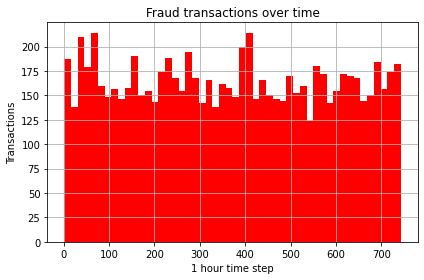

In [30]:
fraudulent = df[df["isFraud"] == 1].drop(["nameOrig", "nameDest", "isFlaggedFraud"], 1)

fraudulent.hist(column ="step",color="red",bins=bins)
plt.xlabel("1 hour time step")
plt.ylabel("Transactions")
plt.title("Fraud transactions over time")
plt.tight_layout()
plt.show()

### Transactions by week day and hour

Get the time and day of the week the a transaction has been done.

In [31]:
# Get the transaction hour and day of transaction
X["HourOfDay"] = X.step % 24  # Calculate hour
X["DayOfWeek"] = X.step % 7   # Calculate day of week
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorBalanceOrig,errorBalanceDest,HourOfDay,DayOfWeek
2,1,0,181.00,181.00,0.0,-1.00,-1.00,1,0.00,1.810000e+02,1,1
3,1,1,181.00,181.00,0.0,21182.00,0.00,1,0.00,2.136300e+04,1,1
15,1,1,229133.94,15325.00,0.0,5083.00,51513.44,0,213808.94,1.827035e+05,1,1
19,1,0,215310.30,705.00,0.0,22425.00,0.00,0,214605.30,2.377353e+05,1,1
24,1,0,311685.89,10835.00,0.0,6267.00,2719172.89,0,300850.89,-2.401220e+06,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.0,0.00,339682.13,1,0.00,0.000000e+00,23,1
6362616,743,0,6311409.28,6311409.28,0.0,-1.00,-1.00,1,0.00,6.311409e+06,23,1
6362617,743,1,6311409.28,6311409.28,0.0,68488.84,6379898.11,1,0.00,1.000000e-02,23,1
6362618,743,0,850002.52,850002.52,0.0,-1.00,-1.00,1,0.00,8.500025e+05,23,1


#### Daily

In this case day 0 does not mean Monday or Sunday. From the latter plots, there is not enough evidence that fraudulent transactions occur at a particular day of the week. Hence showing what they of the week is unimportant information.

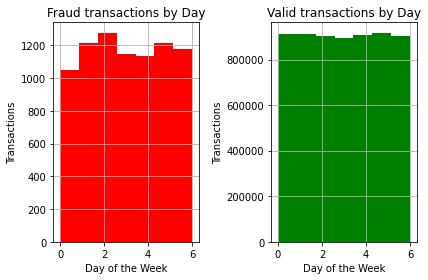

In [32]:
# Get days
num_days = 7

# Get hours
num_hours = 24

# Calculate how many fraud day transactions exist
fraud_days = fraudulent.step % num_days

# Calculate how many genuine day transactions exist
genuine_days = genuine.step % num_days


# Plot the days of the week - fraudulent transactions (red) and the genuine transactions (green) 
plt.subplot(1, 2, 1)
fraud_days.hist(bins=num_days,color="red")
plt.title('Fraud transactions by Day')
plt.xlabel('Day of the Week')
plt.ylabel("Transactions")

plt.subplot(1,2,2)
genuine_days.hist(bins=num_days,color="green")
plt.title('Valid transactions by Day')
plt.xlabel('Day of the Week')
plt.ylabel("Transactions")

plt.tight_layout()
# plt.show()

#### Hourly

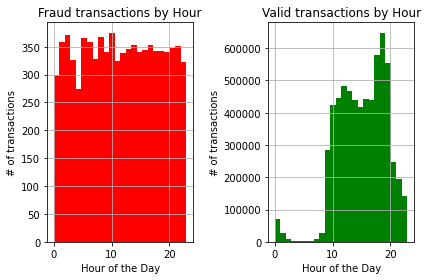

In [33]:
# Calculate how many fraud day transactions exist
fraud_hours = fraudulent.step % num_hours

# Calculate how many genuine hour transactions exist
genuine_hours = genuine.step % num_hours

plt.subplot(1, 2, 1)
fraud_hours.hist(bins=num_hours, color="red")
plt.title('Fraud transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel("# of transactions")


plt.subplot(1, 2, 2)
genuine_hours.hist(bins=num_hours, color="green")
plt.title('Valid transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel("# of transactions")

plt.tight_layout()
plt.show()

## Data visualisation

In order to see if the Machine Learning algorithms will make strong predictions, the fraudulent and genuine transactions need to be visualized. The scatterplot displays the distribution of between the different transaction types.

In [34]:
limit = len(X)

def plotStrip(x, y, hue, figsize = (14, 9)):
    
    fig = plt.figure(figsize = figsize)
    colours = plt.cm.tab10(np.linspace(0, 1, 9))
    with sns.axes_style('ticks'):
        ax = sns.stripplot(x, y, hue = hue, jitter = 0.4, marker = '.', size = 4, palette = colours)
        ax.set_xlabel('')
        ax.set_xticklabels(['genuine', 'fraudulent'], size = 16)
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)

        handles, labels = ax.get_legend_handles_labels()
        plt.legend(handles, ['Transfer', 'Cash out'], bbox_to_anchor=(1, 1), loc=2, borderaxespad=0, fontsize = 16);
        
    return ax

Genuine **CASH_OUT** transactions exceed genuine **TRANSFERs**. The **jitter** parameter in the plotStrip function defines the width of a fingerprint. It tries to make separation between transactions that occur at the same time with different abscissae (**X axis)**.

Fraudulent transactions are more homogeneously distributed compared to genuine ones.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


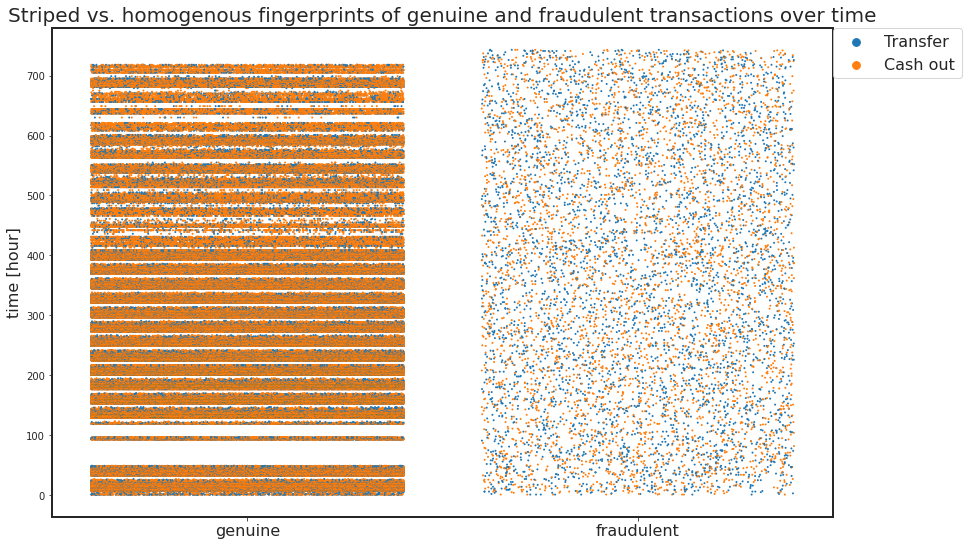

In [35]:
ax = plotStrip(Y[:limit], X.step[:limit], X.type[:limit])
ax.set_ylabel('time [hour]', size = 16)
ax.set_title('Striped vs. homogenous fingerprints of genuine and fraudulent transactions over time', size = 20);

The scatterplot shows that the **errorBalanceDest** is more effective than **amount** for identifing fraud. 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Same-signed fingerprints of genuine and fraudulent transactions over amount')

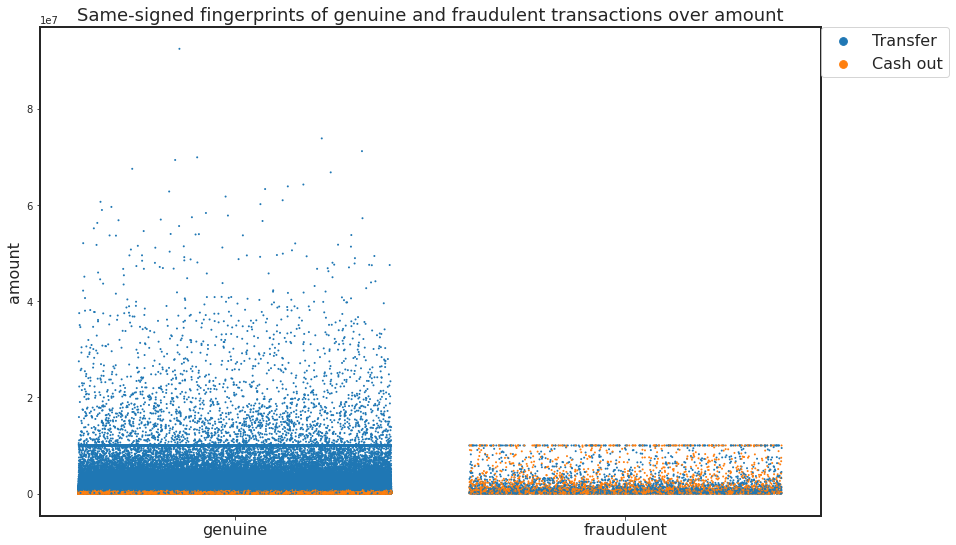

In [36]:
limit = len(X)
ax = plotStrip(Y[:limit], X.amount[:limit], X.type[:limit], figsize = (14, 9))
ax.set_ylabel('amount', size = 16)
ax.set_title('Same-signed fingerprints of genuine and fraudulent transactions over amount', size = 18)

When the dispersion of transactions is viewed over **errorBalanceDest**, it shows that **CASH_OUT** transactions are more common.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Opposite polarity fingerprints over the error in destination account balances')

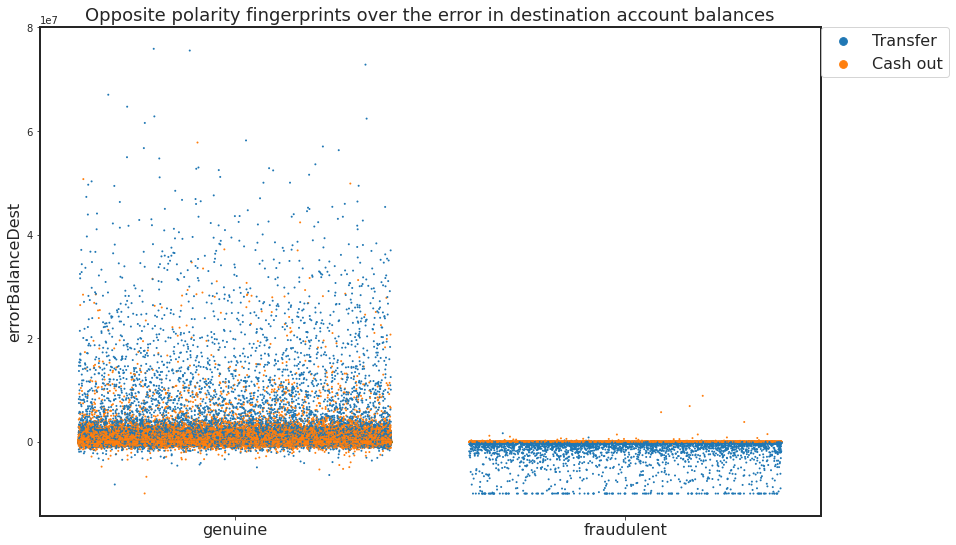

In [37]:
limit = len(X)
ax = plotStrip(Y[:limit], - X.errorBalanceDest[:limit], X.type[:limit], figsize = (14, 9))
ax.set_ylabel('errorBalanceDest', size = 16)
ax.set_title('Opposite polarity fingerprints over the error in destination account balances', size = 18)

The 3D plot shows the fraud and genuine transactions by using **errorBalanceDest** and **errorBalanceOrig**. **Step**  is inefficient in seperating out fraud. 

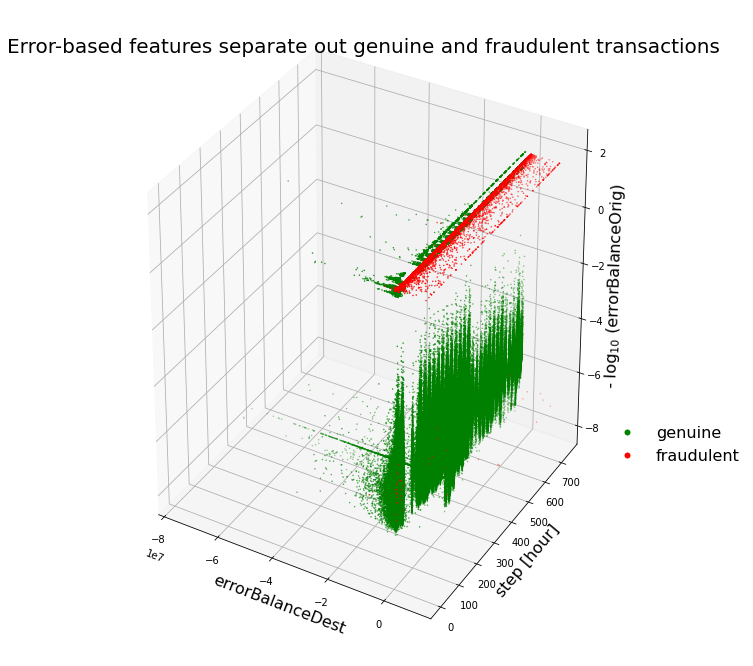

In [38]:
x = 'errorBalanceDest'
y = 'step'
z = 'errorBalanceOrig'
zOffset = 0.02
limit = len(X)

# Prevents seaborn from over-riding mplot3d defaults
sns.reset_orig() 

fig = plt.figure(figsize = (10, 12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X.loc[Y == 0, x][:limit], X.loc[Y == 0, y][:limit], \
  -np.log10(X.loc[Y == 0, z][:limit] + zOffset), c = 'g', marker = '.', \
  s = 1, label = 'genuine')
    
ax.scatter(X.loc[Y == 1, x][:limit], X.loc[Y == 1, y][:limit], \
  -np.log10(X.loc[Y == 1, z][:limit] + zOffset), c = 'r', marker = '.', \
  s = 1, label = 'fraudulent')

ax.set_xlabel(x, size = 16); 
ax.set_ylabel(y + ' [hour]', size = 16); 
ax.set_zlabel('- log$_{10}$ (' + z + ')', size = 16)
ax.set_title('Error-based features separate out genuine and fraudulent transactions', size = 20)

plt.axis('tight')
ax.grid(1)

noFraudMarker = mlines.Line2D([], [], linewidth = 0, color='g', marker='.', markersize = 10, label='genuine')
fraudMarker = mlines.Line2D([], [], linewidth = 0, color='r', marker='.', markersize = 10, label='fraudulent')

plt.legend(handles = [noFraudMarker, fraudMarker], bbox_to_anchor = (1.20, 0.38 ), frameon = False, prop={'size': 16});

The correlation heatmaps below represents the difference between fraudulent and genuine transactions. If a transactions is genuine then it has high correlation with **errorBalanceOrig**. Fraudulent transactions, have a high correlation with **oldBalanceOrig**. 



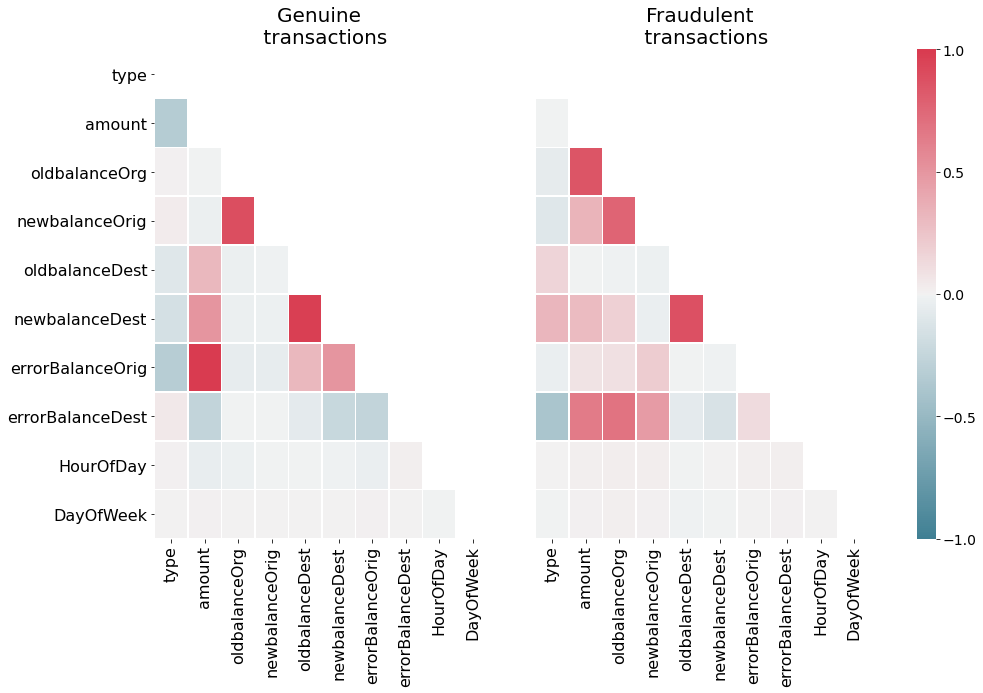

In [39]:
# Clean the data
Xfraud = X.loc[Y == 1]
XnonFraud = X.loc[Y == 0]

correlationNonFraud = XnonFraud.loc[:, (X.columns != 'step') & (X.columns != 'isFraud')].corr()
mask = np.zeros_like(correlationNonFraud)
indices = np.triu_indices_from(correlationNonFraud)
mask[indices] = True

grid_kws = {"width_ratios": (.9, .9, .05), "wspace": 0.2}
f, (ax1, ax2, cbar_ax) = plt.subplots(1, 3, gridspec_kw=grid_kws, \
                                     figsize = (14, 9))

cmap = sns.diverging_palette(220, 8, as_cmap=True)
ax1 =sns.heatmap(correlationNonFraud, ax = ax1, vmin = -1, vmax = 1, \
    cmap = cmap, square = False, linewidths = 0.5, mask = mask, cbar = False)
ax1.set_xticklabels(ax1.get_xticklabels(), size = 16); 
ax1.set_yticklabels(ax1.get_yticklabels(), size = 16); 
ax1.set_title('Genuine \n transactions', size = 20)

correlationFraud = Xfraud.loc[:, (X.columns != 'step') & (X.columns != 'isFraud')].corr()
ax2 = sns.heatmap(correlationFraud, vmin = -1, vmax = 1, cmap = cmap, \
 ax = ax2, square = False, linewidths = 0.5, mask = mask, yticklabels = False, \
    cbar_ax = cbar_ax, cbar_kws={'orientation': 'vertical', 'ticks': [-1, -0.5, 0, 0.5, 1]})
ax2.set_xticklabels(ax2.get_xticklabels(), size = 16); 
ax2.set_title('Fraudulent \n transactions', size = 20);

cbar_ax.set_yticklabels(cbar_ax.get_yticklabels(), size = 14);

# Save data

In [40]:
# Save data
X.to_csv(path+"Encoded PaySim.csv", ",")